# Day 7 : Data Loading and Manipulation and Visulatiozation (New Data)

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly

## Kindly load the las file of well1513.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Plot the null values as horizontal bars
3. Create a copy of the data frame and drop the NAN values
3. Check out the correlation between the features (columns)
4. Calculate the VP log from the DT sonic curve
5. Plot VP vs NPHI using regplot.



In [1]:
!pip install lasio

You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [11]:
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
df=pd.read_csv(r'F:\GeoML-2\GeoML-2.0\10DaysChallenge\assignments\well1513.csv',delimiter=',')
display(df)

,Unnamed: 0,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,...,1.524012,NaN,NaN,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0
18266,18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,...,2.056166,NaN,NaN,0.002087,0.155774,NaN,NaN,NaN,74000,3.0
18267,18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,...,2.909438,NaN,NaN,0.007469,0.155774,NaN,NaN,NaN,74000,3.0
18268,18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,...,2.909438,NaN,NaN,0.010048,0.155774,NaN,NaN,NaN,74000,3.0


In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18270 non-null  int64  
 1   WELL                               18270 non-null  object 
 2   DEPTH_MD                           18270 non-null  float64
 3   X_LOC                              18270 non-null  float64
 4   Y_LOC                              18270 non-null  float64
 5   Z_LOC                              18270 non-null  float64
 6   GROUP                              18270 non-null  object 
 7   FORMATION                          15806 non-null  object 
 8   CALI                               18270 non-null  float64
 9   RSHA                               1623 non-null   float64
 10  RMED                               18270 non-null  float64
 11  RDEP                               18270 non-null  flo

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,18270.000000,18270.000000,18270.000000,1.827000e+04,18270.000000,18270.000000,1623.000000,18270.000000,18270.000000,18270.000000,...,18161.000000,0.0,0.0,18270.000000,17464.000000,0.0,0.0,1627.000000,18270.000000,18270.000000
mean,9134.500000,1883.228478,437627.322429,6.470979e+06,-1857.985240,14.789688,2.901504,1.835372,1.832040,2.110451,...,27.115614,NaN,NaN,0.012675,0.139777,NaN,NaN,5.748493,60476.696223,1.039080
std,5274.239045,801.941195,14.359784,3.508944e+00,801.742890,4.377047,3.474120,2.891524,2.197939,0.297725,...,30.452190,NaN,NaN,0.047393,0.009454,NaN,NaN,71.588789,13972.748152,0.276835
min,0.000000,494.528000,437593.343750,6.470972e+06,-3246.156250,8.186605,0.175400,0.374989,0.352202,1.404576,...,0.138586,NaN,NaN,-0.679026,0.129413,NaN,NaN,0.171424,30000.000000,1.000000
25%,4567.250000,1188.750000,437614.812500,6.470976e+06,-2552.392883,12.125232,0.934778,0.782044,0.799976,1.963399,...,4.727499,NaN,NaN,-0.007219,0.133007,NaN,NaN,0.934500,65000.000000,1.000000
50%,9134.500000,1882.972000,437631.187500,6.470978e+06,-1857.799133,13.913155,1.473143,1.211789,1.293638,2.055079,...,30.297560,NaN,NaN,0.001565,0.136602,NaN,NaN,1.455721,65000.000000,1.000000
75%,13701.750000,2577.802000,437640.781250,6.470982e+06,-1163.699371,18.309367,3.352066,2.067438,2.085021,2.381963,...,39.995598,NaN,NaN,0.020022,0.144990,NaN,NaN,3.464941,65000.000000,1.000000
max,18269.000000,3272.024000,437642.812500,6.470984e+06,-469.501831,23.329569,54.536583,142.606338,49.221905,2.927888,...,1083.425415,NaN,NaN,0.210927,0.156973,NaN,NaN,2000.000000,99000.000000,3.000000


<AxesSubplot:title={'center':'Missing Values Comparison'}>

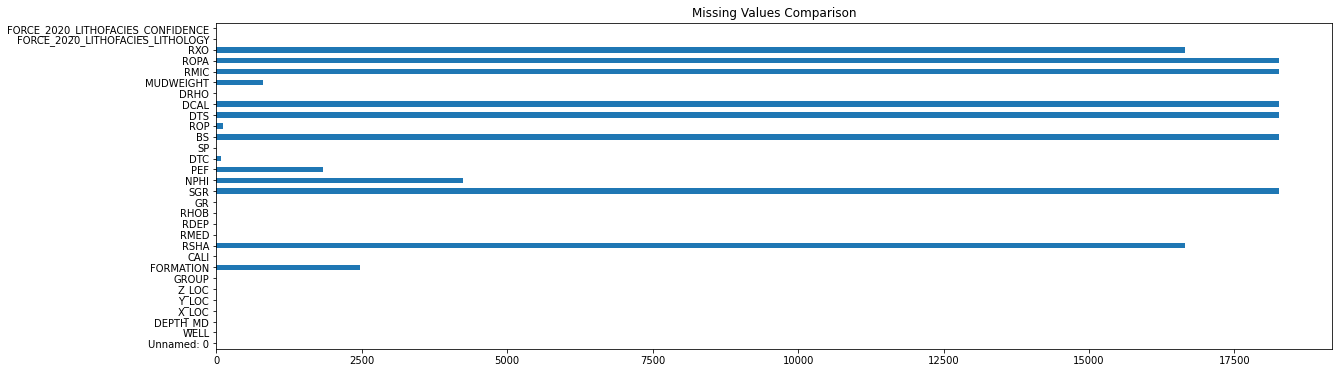

In [18]:
df.isnull().sum().plot(kind = 'barh', title = 'Missing Values Comparison', figsize=(20,6))

In [19]:
df_clean=df.copy()

In [20]:
df_clean.dropna(inplace=True)

In [23]:
df_clean.isnull().sum()

Unnamed: 0                           0.0
WELL                                 0.0
DEPTH_MD                             0.0
X_LOC                                0.0
Y_LOC                                0.0
Z_LOC                                0.0
GROUP                                0.0
FORMATION                            0.0
CALI                                 0.0
RSHA                                 0.0
RMED                                 0.0
RDEP                                 0.0
RHOB                                 0.0
GR                                   0.0
SGR                                  0.0
NPHI                                 0.0
PEF                                  0.0
DTC                                  0.0
SP                                   0.0
BS                                   0.0
ROP                                  0.0
DTS                                  0.0
DCAL                                 0.0
DRHO                                 0.0
MUDWEIGHT       

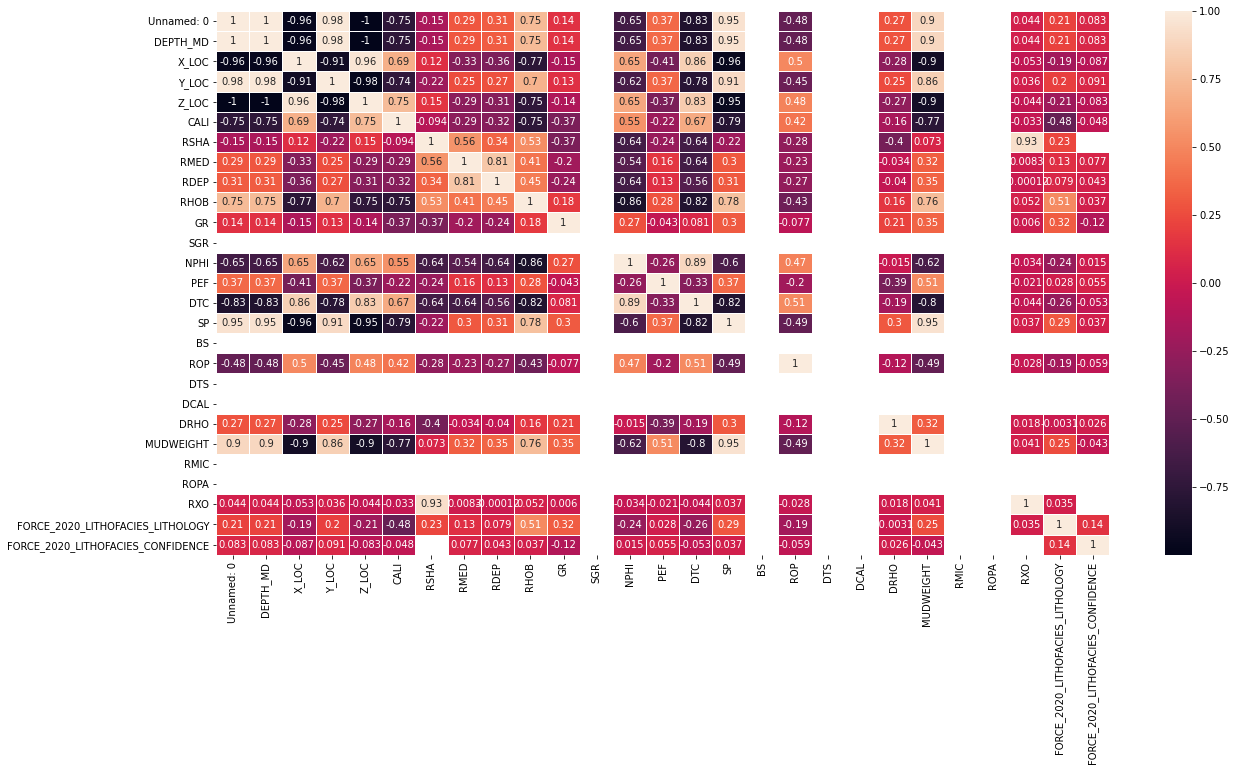

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
sb.heatmap(df.corr(), annot= True,linewidths=1);

In [106]:
df['vp']=1000000/(df['DTC']*3.281)

In [107]:
vp

0        1891.534133
1        1897.749325
2        1902.842284
3        1903.129644
4        1903.380272
            ...     
18265            NaN
18266            NaN
18267            NaN
18268            NaN
18269            NaN
Name: DTC, Length: 18270, dtype: float64

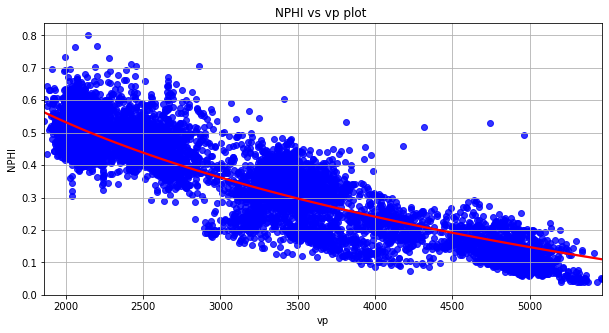

In [108]:
plt.figure(figsize=(10,5))
sb.regplot(data = df, x = 'vp', y = 'NPHI',color='b', fit_reg = True, line_kws={'color':'red'}, marker='o', logx=True)
plt.title('NPHI vs vp plot ')
plt.xlabel('vp')
plt.ylabel('NPHI')
plt.grid();